
# Assignment Set 2
by Amir Mehrpanah for Deep Learing Course at Data Science Center, SBU

In [ ]:
#@title Downloading The Data
import urllib.request
import os

print('Downloading cifar...')

urls = ['https://www.kaggle.com/flo2607/traffic-signs-classification/download/archive.zip']
for item in urls:
    urllib.request.urlretrieve(item, 'data/traffic_signs_classification/'+item.split('/')[-1])

!gunzip data/traffic_signs_classification/*.zip
!ls data/traffic_signs_classification/*

path = '/data/traffic_signs_classification'
y = pd.read_csv('/data/traffic_signs_classification/labels.csv')

gzip: data/traffic_signs_classification/archive.zip: unknown suffix -- ignored
data/traffic_signs_classification/archive.zip


## Importing Libraries

In [ ]:
#@title reading whole data
class_labels = {k:v for (k,v),l in y.value_counts().to_dict().items()}

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(path + '/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )
x, y = data.next()

Found 73139 images belonging to 43 classes.


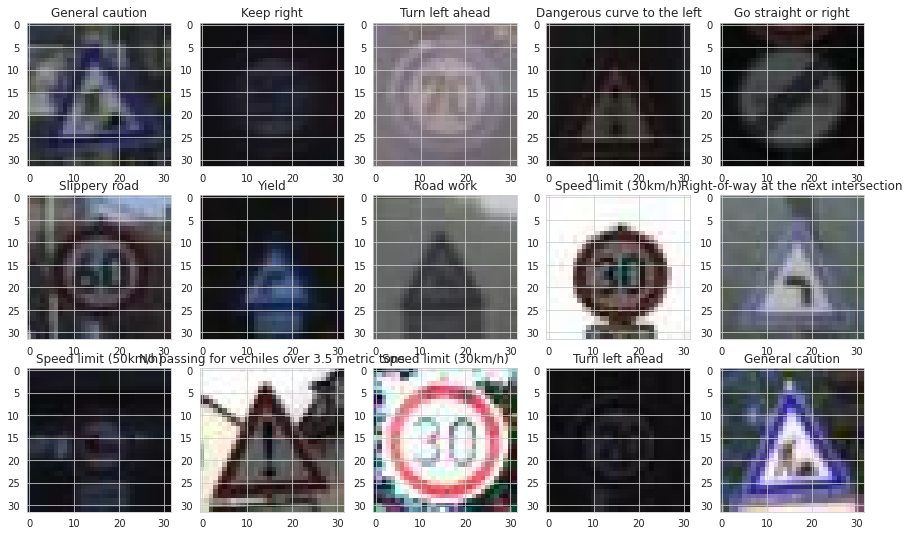

In [ ]:
#@title sample images from the data set
fig, axes = plt.subplots(3,5, figsize=(15,9))
for i,ax in enumerate(axes.flat):
    ax.imshow(x[i].astype('uint8'))
    ax.set_title(str(class_labels[np.argmax(y[i])]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.35)
print("train\t{}\nvalidation\t{}\ntest\t{}".format(x_train.shape,x_val.shape, x_test.shape))

train	(47540, 32, 32, 3)
validation	(8960, 32, 32, 3)
test	(16639, 32, 32, 3)


In [ ]:
#@title Multi Hidden Layer CNNs **With** Output One-Hot Encoding
#@markdown Training a convolutional neural network to compare the performance
name = 'conv_clf_1'
 
input = keras.Input(shape=(32,32,3))
x = layers.Conv2D(32,3,activation="relu")(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(32,3,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32,3,activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.35)(x)
x = layers.Dense(128,activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(43,'softmax')(x)
model = keras.Model(inputs=input, outputs=output, name=name)
model.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])
model.summary()

Model: "conv_clf_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 32)        1

In [ ]:
#@title Fitting The Model

epochs =  30#@param {type:"integer"}
verbose =  2#@param {type:"number"}
model.fit(x = x_train, y = y_train,
                        batch_size=128, epochs=epochs,
                        verbose=verbose,validation_data=(x_val,y_val),
                        validation_batch_size = 64)

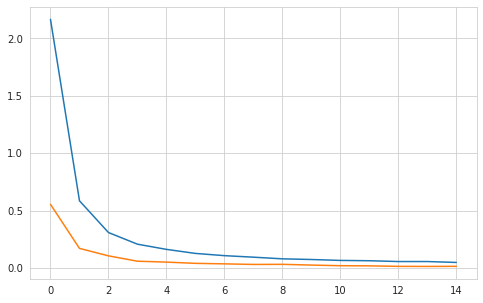

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [ ]:
model.evaluate(x_test, y_test)

520/520 [==============================] - 2s 4ms/step - loss: 0.0186 - accuracy: 0.9939


[0.018620112910866737, 0.993929922580719]

In [ ]:
#@title Multi Hidden Layer CNNs **With** Output One-Hot Encoding
#@markdown Training a convolutional neural network to compare the performance with much fewer parameters
name = 'conv_clf_2'
 
input = keras.Input(shape=(32,32,3))
x = layers.Conv2D(16,3,activation="relu")(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(16,4,activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.35)(x)
x = layers.Dense(64,activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(43,'softmax')(x)
model = keras.Model(inputs=input, outputs=output, name=name)
model.compile(loss=keras.losses.CategoricalCrossentropy(),
            optimizer='Adam',
            metrics=['accuracy'])
model.summary()

Model: "conv_clf_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_17 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 16)        4112      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 16)          0

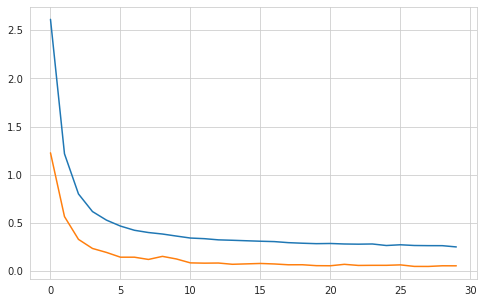

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [ ]:
model.evaluate(x_test, y_test)

520/520 [==============================] - 2s 4ms/step - loss: 0.0539 - accuracy: 0.9890


[0.05388154461979866, 0.9890017509460449]